In [1]:
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import DistanceMetric

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('forecast_influence.csv')

In [5]:
df=df.values

In [6]:
df

array([[  0.00000000e+00,   1.00000000e+00,   5.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   6.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       [  2.00000000e+00,   0.00000000e+00,   6.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       ..., 
       [  5.91100000e+03,   1.00000000e+00,   2.00000000e+00, ...,
          4.05000000e+00,   3.20000000e+01,   1.00000000e+00],
       [  5.91200000e+03,   1.00000000e+00,   2.00000000e+00, ...,
          4.05000000e+00,   3.20000000e+01,   1.00000000e+00],
       [  5.91300000e+03,   1.00000000e+00,   3.00000000e+00, ...,
          1.71666667e+00,   3.20000000e+01,   2.00000000e+00]])

In [7]:
np.shape(df)

(5914, 15)

In [8]:
df=df[:,1:]

In [9]:
df

array([[  1.        ,   5.        ,  25.        , ...,   7.4       ,
         30.        ,   1.        ],
       [  0.        ,   6.        ,  40.        , ...,   7.4       ,
         30.        ,   1.        ],
       [  0.        ,   6.        ,  40.        , ...,   7.4       ,
         30.        ,   1.        ],
       ..., 
       [  1.        ,   2.        ,  40.        , ...,   4.05      ,
         32.        ,   1.        ],
       [  1.        ,   2.        ,  40.        , ...,   4.05      ,
         32.        ,   1.        ],
       [  1.        ,   3.        ,  40.        , ...,   1.71666667,
         32.        ,   2.        ]])

In [10]:
weather=df[:,0:-4]
influence=df[:,-4:]

In [11]:
weather

array([[  1.,   5.,  25., ...,   1.,   1.,   0.],
       [  0.,   6.,  40., ...,   1.,   1.,   0.],
       [  0.,   6.,  40., ...,   1.,   1.,   0.],
       ..., 
       [  1.,   2.,  40., ...,   1.,   0.,   0.],
       [  1.,   2.,  40., ...,   1.,   0.,   0.],
       [  1.,   3.,  40., ...,   1.,   0.,   0.]])

In [12]:
np.shape(weather)

(5914, 10)

In [13]:
weather=StandardScaler().fit_transform(weather)

In [14]:
weather

array([[ 1.35215081, -1.01514804, -0.73704314, ...,  1.38999185,
         2.65036287, -0.13830415],
       [-0.73956248, -0.68543016, -0.49772607, ...,  1.38999185,
         2.65036287, -0.13830415],
       [-0.73956248, -0.68543016, -0.49772607, ...,  1.38999185,
         2.65036287, -0.13830415],
       ..., 
       [ 1.35215081, -2.00430166, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415],
       [ 1.35215081, -2.00430166, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415],
       [ 1.35215081, -1.67458378, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415]])

In [15]:
dist = DistanceMetric.get_metric('euclidean')
pairdist=dist.pairwise(weather)

In [16]:
pairdist

array([[ 0.        ,  2.13365975,  2.13365975, ...,  5.84155899,
         5.84155899,  4.529051  ],
       [ 2.13365975,  0.        ,  0.        , ...,  6.3104447 ,
         6.3104447 ,  5.10051781],
       [ 2.13365975,  0.        ,  0.        , ...,  6.3104447 ,
         6.3104447 ,  5.10051781],
       ..., 
       [ 5.84155899,  6.3104447 ,  6.3104447 , ...,  0.        ,
         0.        ,  3.9512309 ],
       [ 5.84155899,  6.3104447 ,  6.3104447 , ...,  0.        ,
         0.        ,  3.9512309 ],
       [ 4.529051  ,  5.10051781,  5.10051781, ...,  3.9512309 ,
         3.9512309 ,  0.        ]])

In [17]:
ndist=np.sort(pairdist)

In [18]:
ndist=ndist[:,19]

In [19]:
ndist=np.sort(ndist)[::-1]

In [20]:
plotx=range(0,len(ndist))

In [21]:
plt.plot(plotx, ndist)

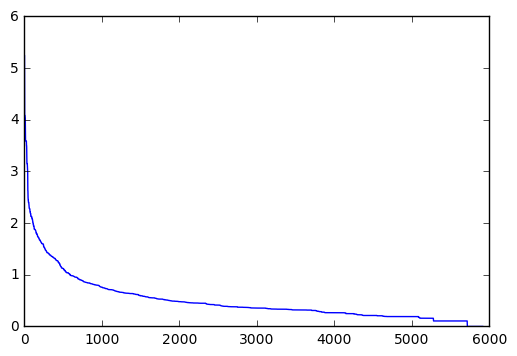

In [22]:
plt.show()

In [23]:
ndist[750]

0.88511796114242547

In [24]:
db = DBSCAN(eps=0.885, min_samples=19).fit(weather)

In [25]:
labels = db.labels_

In [26]:
labels

array([-1, -1, -1, ...,  9,  9,  5])

In [27]:
influence_cluster=np.c_[influence,labels]

In [28]:
influence_cluster

array([[  0.        ,   7.4       ,  30.        ,   1.        ,  -1.        ],
       [  0.        ,   7.4       ,  30.        ,   1.        ,  -1.        ],
       [  0.        ,   7.4       ,  30.        ,   1.        ,  -1.        ],
       ..., 
       [  0.        ,   4.05      ,  32.        ,   1.        ,   9.        ],
       [  0.        ,   4.05      ,  32.        ,   1.        ,   9.        ],
       [  1.        ,   1.71666667,  32.        ,   2.        ,   5.        ]])

In [29]:
np.save("dbscan_result",influence_cluster)

In [30]:
np.savetxt("dbscan_result.csv", influence_cluster, delimiter=",")